In [9]:
import pandas as pd
import jsonlines
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
sns.set_style("white")
figsize = (4, 3)
sns.set_palette("bright")

# Set the font family
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams["font.size"] = 12
sns.set_context("paper") #, font_scale=2)

# Geospatial data Field of Study

In [18]:
# read json file
import json
with open("../data/dataverse_subject_frequency.json", "r") as f:
    data = json.load(f)

data = pd.DataFrame().from_dict(data, orient='index', columns=["count"]).reset_index()
data.sort_values(by="count", ascending=False, inplace=True)

In [19]:
data['index'] = data['index'].replace({"Earth and Environmental Sciences":"Earth and Env. Sciences",
    "Agricultural Sciences":"Agricultural Sciences",
    "Computer and Information Science":"Computer and Info. Science",
    "Astronomy and Astrophysics":"Astronomy and Astrophysics",
    "Arts and Humanities":"Arts and Humanities",
     "Mathematical Sciences":"Mathematical Sciences",
    })

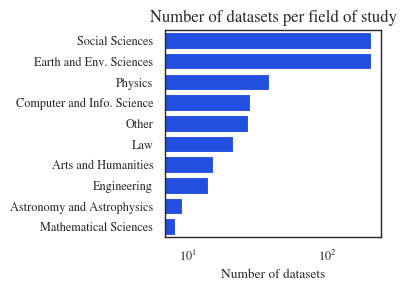

In [20]:
f, ax = plt.subplots(figsize=figsize)
ax.set( xscale="log")
ax = sns.barplot(data[:10], y="index", x="count")

ax.set_ylabel("")
ax.set_xlabel("Number of datasets")
ax.set_title("Number of datasets per field of study", fontsize=12)
#ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.savefig("../results/dataset-frequency-per-subject.pdf", bbox_inches="tight")

In [21]:
# From: https://dataverse.harvard.edu/api/info/metrics/datasets/bySubject

subjects = {
    "Social Sciences":	32481,
    "Arts and\nHumanities":	30793,
    "Medicine, Health\nand Life Sciences":	6514,
    "Law":	5518,
    "Earth and\nEnv. Sciences":	3157,
    "Agricultural\nSciences":	2296,
    "Computer and\nInfo. Science":	2049,
   # "Other":	1536,
    "Business and\nManagement":	1243,
    "Engineering":	1203,
    "Physics":	1147,
    "Astronomy and Astrophysics":	1003,
    "Chemistry":	561,
    "Mathematical Sciences":	418,
}

# Dataverse dataset stats

In [24]:
with jsonlines.open('../data/summary-stats-items-2.jsonl') as reader:
    data = [obj for obj in reader]
df = pd.DataFrame(data)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df["published_at"] = pd.to_datetime(df.published_at)
df["year"] = df.published_at.dt.year
df['size_in_mb'] = df['size_in_bytes'] / 1048576
df['format'] = df['name'].str.split('.').str[-1]
df["format"] = df.format.str.lower()
len(df)

54958

In [27]:
df.head()

,file_id,name,published_at,size_in_bytes,dataset_name,dataset_id,dataset_persistent_id,description,year,size_in_mb,format
0,2728543,WY2008_RME.nc,2015-11-20 21:47:56+00:00,365543383,"ISNOBAL Inputs from Reynolds Mountain East, Wa...",2728542,doi:10.7910/DVN/KQC2RU,,2015,348.609336,nc
1,3101967,BAT_SPAN_130813.2F.nc,2018-01-10 16:57:24+00:00,21267108,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,20.281895,nc
2,3101979,BAT_SPAN_130826.1F.nc,2018-01-10 16:57:24+00:00,21928628,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,20.912769,nc
3,3101964,BAT_SPAN_130827.1F.nc,2018-01-10 16:57:24+00:00,34717388,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,33.109081,nc
4,3101969,BAT_SPAN_130828.1F.nc,2018-01-10 16:57:24+00:00,34125872,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,32.544968,nc


In [28]:
formats = ["shp", "geojson", "gdb", "nc", "hdf", "hdf5"] # remove gpx, gml
df = df[df.format.isin(formats)]
df.head()

,file_id,name,published_at,size_in_bytes,dataset_name,dataset_id,dataset_persistent_id,description,year,size_in_mb,format
0,2728543,WY2008_RME.nc,2015-11-20 21:47:56+00:00,365543383,"ISNOBAL Inputs from Reynolds Mountain East, Wa...",2728542,doi:10.7910/DVN/KQC2RU,,2015,348.609336,nc
1,3101967,BAT_SPAN_130813.2F.nc,2018-01-10 16:57:24+00:00,21267108,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,20.281895,nc
2,3101979,BAT_SPAN_130826.1F.nc,2018-01-10 16:57:24+00:00,21928628,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,20.912769,nc
3,3101964,BAT_SPAN_130827.1F.nc,2018-01-10 16:57:24+00:00,34717388,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,33.109081,nc
4,3101969,BAT_SPAN_130828.1F.nc,2018-01-10 16:57:24+00:00,34125872,Alaska 2013 Campaign,3101954,doi:10.7910/DVN/YM70Y7,,2018,32.544968,nc


In [29]:
len(df)

54552

In [31]:
df.size_in_mb.describe()

count    54552.000000
mean        36.985121
std        171.723427
min          0.000000
25%          2.660103
50%          7.091904
75%         37.222397
max       2531.377435
Name: size_in_mb, dtype: float64

In [32]:
df.format.value_counts()

format
nc         49826
geojson     3615
shp          658
hdf5         411
hdf           42
Name: count, dtype: int64

This code was used to get the list of files for the second experiment: 

```
with jsonlines.open('doi_field_map.jsonl') as reader:
    data = [obj for obj in reader]

envsci = []
for d in data:
    for k in d:
        if "Earth and Environmental Sciences" in d[k]:
            envsci.append(k)

df[
    df.dataset_persistent_id.isin(envsci) & df.format.isin(["nc","hdf5"])].groupby(
        ["dataset_persistent_id", "format"])["file_id"].first().to_csv("envsci-nc-hdf5.csv")
```

## Size by file format

In [33]:
order = ["shp", "geojson",  "hdf5","hdf", "nc"] # ["shp",  "geojson",  "nc","hdf", "hdf5"] #, "gdb"]

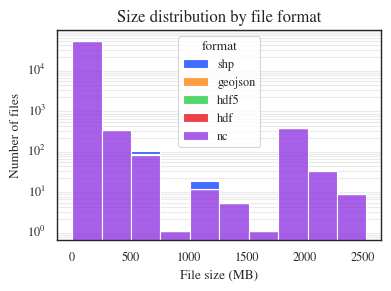

In [34]:
# File size distribution

f, ax = plt.subplots(figsize=figsize)
ax.set(yscale="log")
#ax.set_ylim([0, 200])
ax = sns.histplot(
    df, x="size_in_mb", hue="format", hue_order=order, multiple="stack", bins=10, #binwidth=250
    )

ax.set_xlabel("File size (MB)")
ax.set_ylabel("Number of files")
ax.set_title("Size distribution by file format", fontsize=12)

# Display grid
plt.grid(True, which ="minor", axis="y", alpha=0.4)

plt.tight_layout()
plt.savefig("../results/size-distribution-by-file-format.pdf", bbox_inches="tight")

## File frequency per year

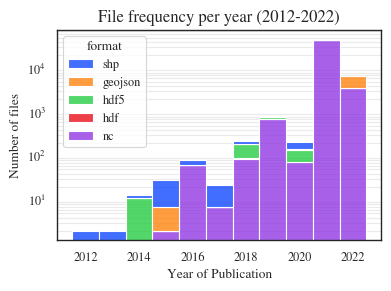

In [35]:
f, ax = plt.subplots(figsize=figsize)
ax.set(yscale="log")
#ax.legend(title="Format", loc='upper right')
ax = sns.histplot(
    df[(df.year>=2012) & (df.year < 2023)], 
    x="year", 
    hue="format", hue_order=order, 
    multiple= "stack", 
    #element="poly",
    bins=10,
    discrete=True)

ax.set_xlabel("Year of Publication")
ax.set_ylabel("Number of files")
ax.set_title("File frequency per year (2012-2022)", fontsize=12)
plt.grid(True, which ="minor", axis="y", alpha=0.4)
plt.tight_layout()
plt.savefig("../results/file-frequency-per-year.pdf", bbox_inches="tight")

# Dataset stats

In [36]:
aggdf = df.groupby("dataset_id").agg({"dataset_name": "first", 
                                      "year": "first", 
                                      "file_id":"size",
                                      "format": lambda x: x.mode().iloc[0]}).reset_index()
#first().reset_index()

In [37]:
aggdf.head()

,dataset_id,dataset_name,year,file_id,format
0,2670805,Milano Grid,2015,1,geojson
1,2671182,Replication Data for: How Legislators Respond ...,2015,1,shp
2,2672084,"Replication Data for: ""The Spatial Dimensions ...",2015,1,shp
3,2674644,Social Pulse - Milano,2015,1,geojson
4,2674652,Trentino Grid,2015,1,geojson


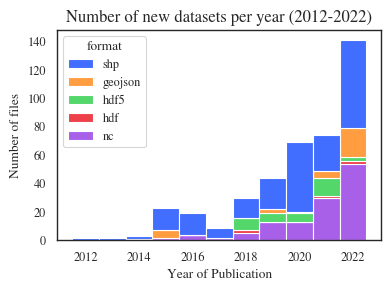

In [38]:
f, ax = plt.subplots(figsize=figsize)
#ax.set(xscale="log", yscale="log")
ax = sns.histplot(aggdf[(aggdf.year>=2012) & (aggdf.year < 2023)], 
    x="year", 
    hue="format", 
    hue_order=order,
    multiple="stack", 
    bins=10,
    discrete=True)

ax.set_xlabel("Year of Publication")
ax.set_ylabel("Number of files")
ax.set_title("Number of new datasets per year (2012-2022)", fontsize=12)

plt.tight_layout()
plt.savefig("../results/dataset-frequency-per-year.pdf", bbox_inches="tight")

Text(0.5, 1.0, 'Number of files per dataset')

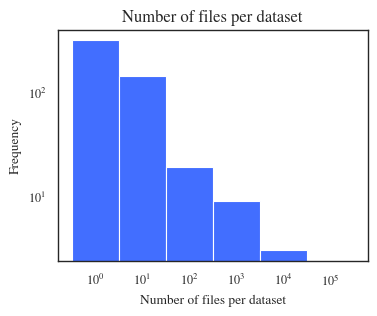

In [39]:
f, ax = plt.subplots(figsize=figsize)
ax.set(yscale="log", xscale="log") #, xlim=(-10, 6000))
ax = sns.histplot(
    aggdf, x="file_id", bins=10, discrete=True)

ax.set_xlabel("Number of files per dataset")
ax.set_ylabel("Frequency")
ax.set_title("Number of files per dataset", fontsize=12)

In [40]:
len(aggdf)

489

In [41]:
len(aggdf[aggdf.dataset_name.str.lower().str.contains("replication data")])/len(aggdf)*100

37.21881390593047

## Word Cloud

In [42]:
aggdf['dataset_name'] = aggdf['dataset_name'].str.lower()
aggdf['dataset_name'] = aggdf['dataset_name'].str.replace('replication data', '')
aggdf['dataset_name'] = aggdf['dataset_name'].str.replace('alcator c-mod', '')

In [43]:
text = ' '.join(aggdf.dataset_name.astype(str))

In [44]:
cmap = sns.color_palette("tab10", as_cmap=True)

In [45]:
stopwords = ["the","a","an","as","i","their","how","new","for","of","all","in","on","at","with","from",
             "to","and","des","s","c","de","-","replication data","mod","up","out","l","u","is","set","do",
             "does","are","were","was","this","that","these","those","it","its","they","them","there","here",
             "or","by","d"]

In [46]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                width = 1300, height = 600, 
                background_color ='white', 
                colormap=cmap,
                stopwords = stopwords,
                relative_scaling = 0.1,
                min_font_size = 8,
                max_font_size = 100,
                max_words = 350,
)

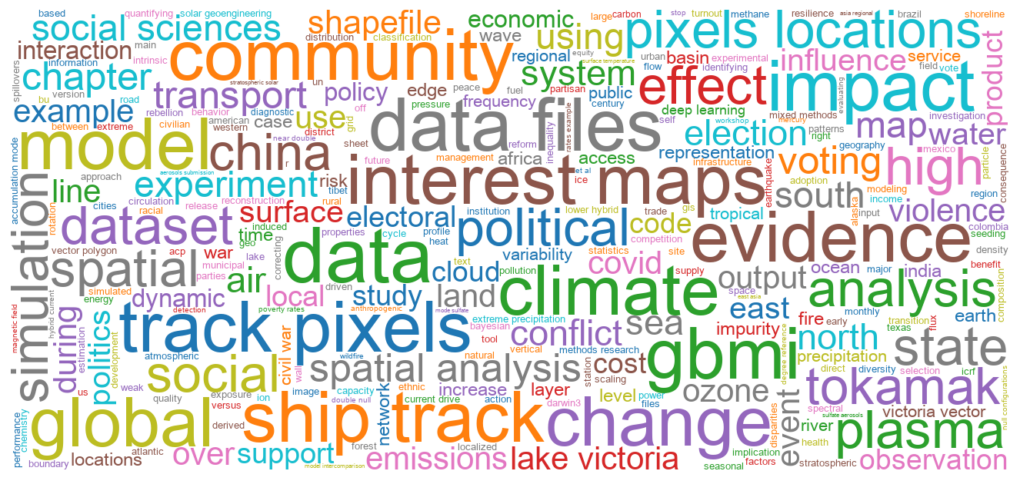

In [48]:
wordcloud = wordcloud.generate(text)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("../results/wordcloud.pdf", dpi=300)
plt.show() 

## Time Saved for Download and the Internet Speed 

In [52]:
# Open json file with internet speed data

# Data source: https://worldpopulationreview.com/state-rankings/average-internet-speed-by-state
# Updated April 2023
# in Mbps

import json
with open("data/avg-internet-speed.json") as f:
    data = json.load(f)

data = pd.DataFrame().from_dict(data, orient='index', columns=["avgspeed"]).reset_index()

In [53]:
data.head()

,index,avgspeed
0,Alabama,344.6
1,Alaska,285.1
2,Arizona,396.1
3,Arkansas,230.4
4,California,93.0


In [54]:
data.avgspeed.describe()

count     52.000000
mean     322.839231
std       92.030995
min       93.000000
25%      272.400000
50%      322.570000
75%      396.500000
max      506.700000
Name: avgspeed, dtype: float64

In [55]:
df.size_in_mb.describe()

count    54552.000000
mean        36.985121
std        171.723427
min          0.000000
25%          2.660103
50%          7.091904
75%         37.222397
max       2531.377435
Name: size_in_mb, dtype: float64

In [56]:
sizes = np.linspace(2500, 100, 5)
speeds = np.linspace(10, 300, 3)

res = []
for speed in speeds:
    r = [f"{int(speed)} Mbps"]
    for size in sizes:
        download_time = (size / (speed/8))/60
        download_time = round(download_time, 2)
        #speed = int(speed)
        r.append(download_time)
        #print(f"Size: {size} MB, Speed: {speed} Mbps, Download time: {download_time} seconds")
    res.append(r)

res = pd.DataFrame(res, columns=["speed"] + [str(size) + " MB" for size in sizes])

In [57]:
res

,speed,2500.0 MB,1900.0 MB,1300.0 MB,700.0 MB,100.0 MB
0,10 Mbps,33.33,25.33,17.33,9.33,1.33
1,155 Mbps,2.15,1.63,1.12,0.60,0.09
2,300 Mbps,1.11,0.84,0.58,0.31,0.04
